In [2]:
import os
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import subprocess

In [3]:
# Set variables
BATCH_ID="BATCH1"
numcycles=12
imperwell = 320
row_widths = [4, 8, 12, 14, 16,
                        18, 18, 20, 20, 20,
                        20, 20, 20, 20, 18,
                        18, 16, 14, 12, 8, 4]

# sgRNA library

In [ ]:
bc_df = pd.read_csv('/Users/eweisbar/Documents/projects/PROJECT/Barcodes.csv')
gene_col = 'Gene'
barcode_col = 'sgRNA'

In [ ]:
# Describe barcodes
print(len(bc_df), "total barcodes")
rep5 = sum([any(repeat in read for repeat in ['AAAAA','CCCCC','GGGGG','TTTTT']) for read in bc_df['sgRNA']])
rep6 = sum([any(repeat in read for repeat in ['AAAAAA','CCCCCC','GGGGGG','TTTTTT']) for read in bc_df['sgRNA']])
rep7 = sum([any(repeat in read for repeat in ['AAAAAAA','CCCCCCC','GGGGGGG','TTTTTTT']) for read in bc_df['sgRNA']])
print("For full read")
print(rep5, "barcodes with 5 repeats", rep5/len(bc_df), "% 5 repeats")
print(rep6, "barcodes with 6 repeats", rep6/len(bc_df), "% 6 repeats")
print(rep7, "barcodes with 7 repeats", rep7/len(bc_df), "% 7 repeats")

rep5 = sum([any(repeat in read[:10] for repeat in ['AAAAA','CCCCC','GGGGG','TTTTT']) for read in bc_df['sgRNA']])
rep6 = sum([any(repeat in read[:10] for repeat in ['AAAAAA','CCCCCC','GGGGGG','TTTTTT']) for read in bc_df['sgRNA']])
rep7 = sum([any(repeat in read[:10] for repeat in ['AAAAAAA','CCCCCCC','GGGGGGG','TTTTTTT']) for read in bc_df['sgRNA']])
print("For 10 nt read")
print(rep5, "barcodes with 5 repeats", rep5/len(bc_df), "% 5 repeats")
print(rep6, "barcodes with 6 repeats", rep6/len(bc_df), "% 6 repeats")
print(rep7, "barcodes with 7 repeats", rep7/len(bc_df), "% 7 repeats")

In [ ]:
dflist = []
for cycle in range(1,numcycles+1):
    bc_df['PerCycle'] = bc_df['sgRNA'].str.slice(cycle -1, cycle)
    BarcodeCat = bc_df['PerCycle'].str.cat()
    dflist.append({'Cycle' : int(cycle), 'Nucleotide' : 'A', 'Frequency' : float(BarcodeCat.count('A'))/float(len(BarcodeCat))})
    dflist.append({'Cycle' : int(cycle), 'Nucleotide' : 'C', 'Frequency' : float(BarcodeCat.count('C'))/float(len(BarcodeCat))})
    dflist.append({'Cycle' : int(cycle), 'Nucleotide' : 'G', 'Frequency' : float(BarcodeCat.count('G'))/float(len(BarcodeCat))})
    dflist.append({'Cycle' : int(cycle), 'Nucleotide' : 'T', 'Frequency' : float(BarcodeCat.count('T'))/float(len(BarcodeCat))})
df_parsed = pd.DataFrame(dflist)
g = sns.lineplot(x="Cycle", y="Frequency", hue="Nucleotide", data=df_parsed)
g.set_ylim([.1,.5])
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[0:], labels=labels[0:])
g.set_xticks(list(range(1,numcycles+1)))

# Barcode Calling

In [4]:
# Useful function for merging CSVs contained in folders within one folder

def merge_csvs(csvfolder, filename, column_list=None):
    """ csvfolder is a path to a folder
    Iterates over all of the folders inside of that CSVfolder
    Merges the CSVs that match the filename into one dataframe 
    If a column list is passed, it keeps columns defined in the column list
    Prints a time stamp every 500 csvs
    Returns the merged dataframe
    """

    df_dict={}
    count = 0
    folderlist = os.listdir(csvfolder)
    print(count, datetime.datetime.ctime(datetime.datetime.now()))
    for eachfolder in folderlist:
            if os.path.isfile(os.path.join(csvfolder, eachfolder, filename)):
                if not column_list:
                    df_dict[eachfolder]=pd.read_csv(os.path.join(csvfolder, eachfolder, filename),index_col=False)
                else:
                    df_dict[eachfolder]=pd.read_csv(os.path.join(csvfolder, eachfolder, filename),index_col=False,usecols=column_list)
                count+=1
                if count % 500 == 0:
                    print(count, datetime.datetime.ctime(datetime.datetime.now()))
    print(count, datetime.datetime.ctime(datetime.datetime.now()))
    df_merged = pd.concat(df_dict, ignore_index=True)
    print('done concatenating at', datetime.datetime.ctime(datetime.datetime.now()))
    
    return df_merged

In [5]:
# Merge Foci csvs
#Run if csvs are in separate folders
filename = 'BarcodePreprocessing_Foci.csv'
column_list = ['ImageNumber', 'ObjectNumber', 'Metadata_Plate', 'Metadata_Site', 'Metadata_Well', 'Metadata_Well_Value', 'Barcode_BarcodeCalled', 'Barcode_MatchedTo_Barcode', 'Barcode_MatchedTo_GeneCode', 'Barcode_MatchedTo_ID', 'Barcode_MatchedTo_Score']

csvfolder = "D:\\BATCH1\\images_corrected\\barcoding"
df_foci = merge_csvs(csvfolder, filename, column_list)
#df_foci = merge_csvs(csvfolder, filename)

0 Mon Mar 11 17:58:46 2024
500 Mon Mar 11 18:09:32 2024
1000 Mon Mar 11 18:20:15 2024
1500 Mon Mar 11 18:31:24 2024
1920 Mon Mar 11 18:41:06 2024
done concatenating at Mon Mar 11 18:41:10 2024


In [8]:
df_foci.head()

,ImageNumber,ObjectNumber,Metadata_Plate,Metadata_Site,Metadata_Well,Metadata_Well_Value,Barcode_BarcodeCalled,Barcode_MatchedTo_Barcode,Barcode_MatchedTo_GeneCode,Barcode_MatchedTo_ID,Barcode_MatchedTo_Score
0,1,1,CP_Plate_1,0,Well1,1,AAGCCGTAGTGT,AAGCCGTAGTGTTACCAATG,KATNA1,1332,1.00
1,1,2,CP_Plate_1,0,Well1,1,AGGACCATCCCT,AGGACCATCCCTTTGAGTAT,GABARAPL1,1471,1.00
2,1,3,CP_Plate_1,0,Well1,1,AAGCCGTAGTGT,AAGCCGTAGTGTTACCAATG,KATNA1,1332,1.00
3,1,4,CP_Plate_1,0,Well1,1,TTACATCTTAGA,TTACATCTTAGAGAGCTTGG,RPL35,1343,1.00
4,1,5,CP_Plate_1,0,Well1,1,CGCCCCCCCCCT,CGCCTCCTCACTTTCAACAG,MORF4L2,1084,0.75


83.87760130718412  percent perfect overall
22248881 count perfect foci


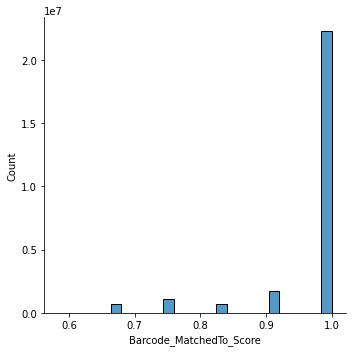

In [9]:
# useful dataframe manipulations 
df_foci.sort_values(by=['Metadata_Well_Value', 'Metadata_Site'], inplace=True)
df_foci['well-site'] = df_foci['Metadata_Well'] + '-' + df_foci['Metadata_Site'].astype(str)
df_foci_well_groups = df_foci.groupby("Metadata_Well_Value")

print(sum(df_foci['Barcode_MatchedTo_Score']==1)*100.0/sum(df_foci['Barcode_MatchedTo_Score']>0),' percent perfect overall')
print (f"{len(df_foci.loc[df_foci['Barcode_MatchedTo_Score']==1])} count perfect foci")
sns.displot(df_foci['Barcode_MatchedTo_Score'], kde=False)

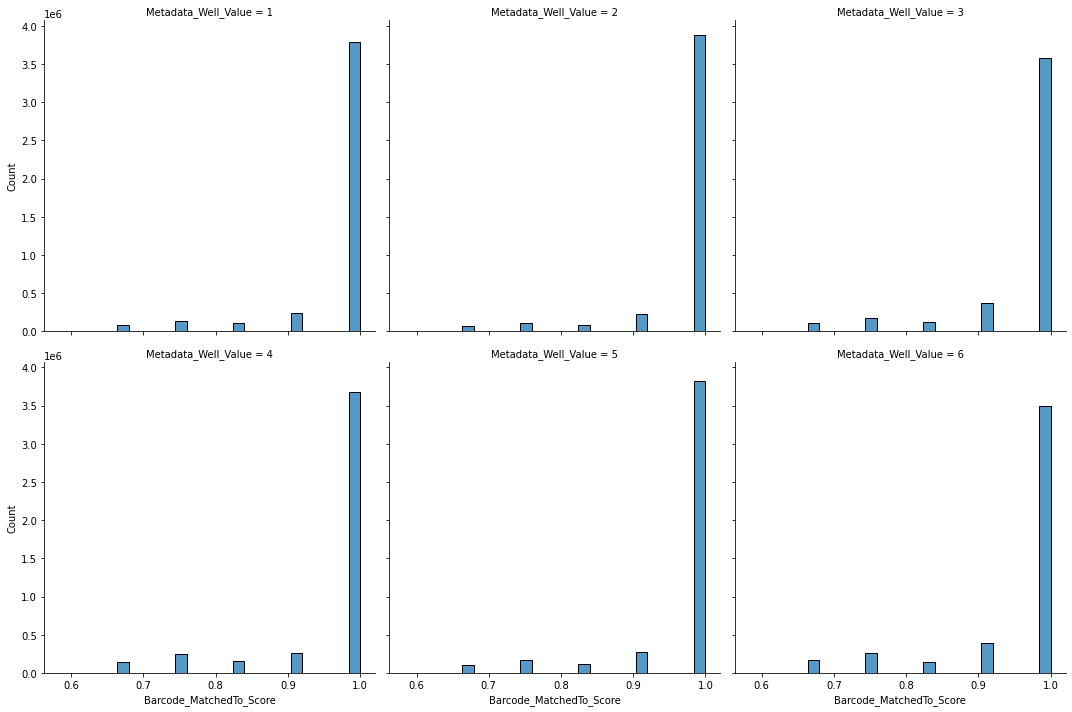

In [10]:
sns_displot = sns.displot(
    df_foci, x="Barcode_MatchedTo_Score", col="Metadata_Well_Value", col_wrap=3
)

In [11]:
readlist = df_foci['Barcode_BarcodeCalled']
print ('% Reads with >4 repeat nucleotide calls')
print (100*pd.Series([any(repeat in read for repeat in ['AAAAA','CCCCC','GGGGG','TTTTT']) for read in readlist]).mean())

% Reads with >4 repeat nucleotide calls
1.1743002390085222


"\nfor ax in g.axes[0]:\n    for idx,row in df_foci_pp.iterrows():\n        x = row['x_loc']\n        y = row['y_loc']\n        text = row['Metadata_Site']\n        ax.text(x,y,text, horizontalalignment='center')\n"

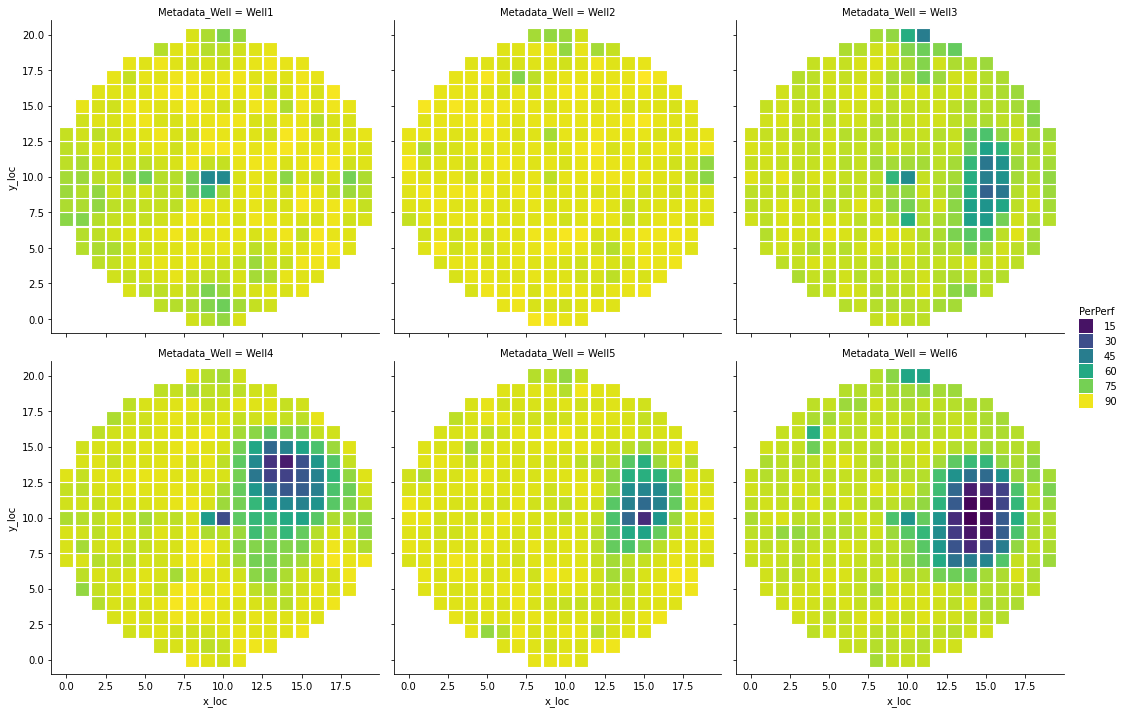

In [19]:
# Pos df
# Creates x, y coordinates for plotting per-plate views.

max_width = max(row_widths)
pos_dict = {}
count = 0
# creates dict of (xpos,ypos) = imnumber
for row in range(len(row_widths)):
    row_width = row_widths[row]
    left_pos = int((max_width-row_width)/2)
    for col in range(row_width):
        if row%2 == 0:
            pos_dict[(int(left_pos + col), row)] = count
            count += 1
        else:
            right_pos = left_pos + row_width - 1
            pos_dict[(int(right_pos - col), row)] = count
            count += 1
# make dict into df
pos_df = pd.DataFrame.from_dict(pos_dict, orient = "index").reset_index().rename(columns={"index": "loc", 0: "Metadata_Site"})
pos_df[['x_loc', 'y_loc']] = pd.DataFrame(pos_df['loc'].tolist(), index=pos_df.index) 
# % Perfect by well
df_foci_slice = df_foci.loc[:, ['Metadata_Well', 'Metadata_Site', 'Barcode_MatchedTo_Score']]
df_foci_perf = df_foci_slice[df_foci_slice['Barcode_MatchedTo_Score']==1]
df_foci_perf = (
    df_foci_perf.groupby(["Metadata_Well", "Metadata_Site"])
    .count()
    .reset_index()
    .rename(columns={"Barcode_MatchedTo_Score": "Num_Perf"})
)
df_foci_slice = (
    df_foci_slice.groupby(["Metadata_Well", "Metadata_Site"])
    .count()
    .reset_index()
    .rename(columns={"Barcode_MatchedTo_Score": "Num_Total"})
)
df_foci_pp = df_foci_perf.merge(df_foci_slice, on = ['Metadata_Well', 'Metadata_Site'])
df_foci_pp["PerPerf"] = (df_foci_pp["Num_Perf"] / df_foci_pp["Num_Total"])*100
df_foci_pp["PerPerf"] = df_foci_pp["PerPerf"].astype('int')

# Add the location to the foci dfs
df_foci_pp = df_foci_pp.merge(pos_df, on='Metadata_Site').reset_index()

g = sns.relplot(
    data=df_foci_pp,
    x="x_loc", y="y_loc", hue="PerPerf", col='Metadata_Well', col_wrap = 3,
    palette='viridis', marker='s', s=200
)
"""
for ax in g.axes[0]:
    for idx,row in df_foci_pp.iterrows():
        x = row['x_loc']
        y = row['y_loc']
        text = row['Metadata_Site']
        ax.text(x,y,text, horizontalalignment='center')
"""
# note missing sites indicate that site has zero perfect barcodes

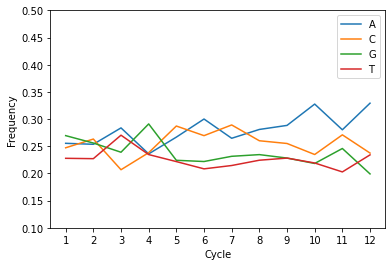

In [13]:
dflist = []
for cycle in range(1,numcycles+1):
    df_foci['PerCycle'] = df_foci['Barcode_BarcodeCalled'].str.slice(cycle -1, cycle)
    BarcodeCat = df_foci['PerCycle'].str.cat()
    dflist.append({'Cycle' : int(cycle), 'Nucleotide' : 'A', 'Frequency' : float(BarcodeCat.count('A'))/float(len(BarcodeCat))})
    dflist.append({'Cycle' : int(cycle), 'Nucleotide' : 'C', 'Frequency' : float(BarcodeCat.count('C'))/float(len(BarcodeCat))})
    dflist.append({'Cycle' : int(cycle), 'Nucleotide' : 'G', 'Frequency' : float(BarcodeCat.count('G'))/float(len(BarcodeCat))})
    dflist.append({'Cycle' : int(cycle), 'Nucleotide' : 'T', 'Frequency' : float(BarcodeCat.count('T'))/float(len(BarcodeCat))})
df_parsed = pd.DataFrame(dflist)
g = sns.lineplot(x="Cycle", y="Frequency", hue="Nucleotide", data=df_parsed)
g.set_ylim([.1,.5])
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[0:], labels=labels[0:])
g.set_xticks(list(range(1,numcycles+1)))

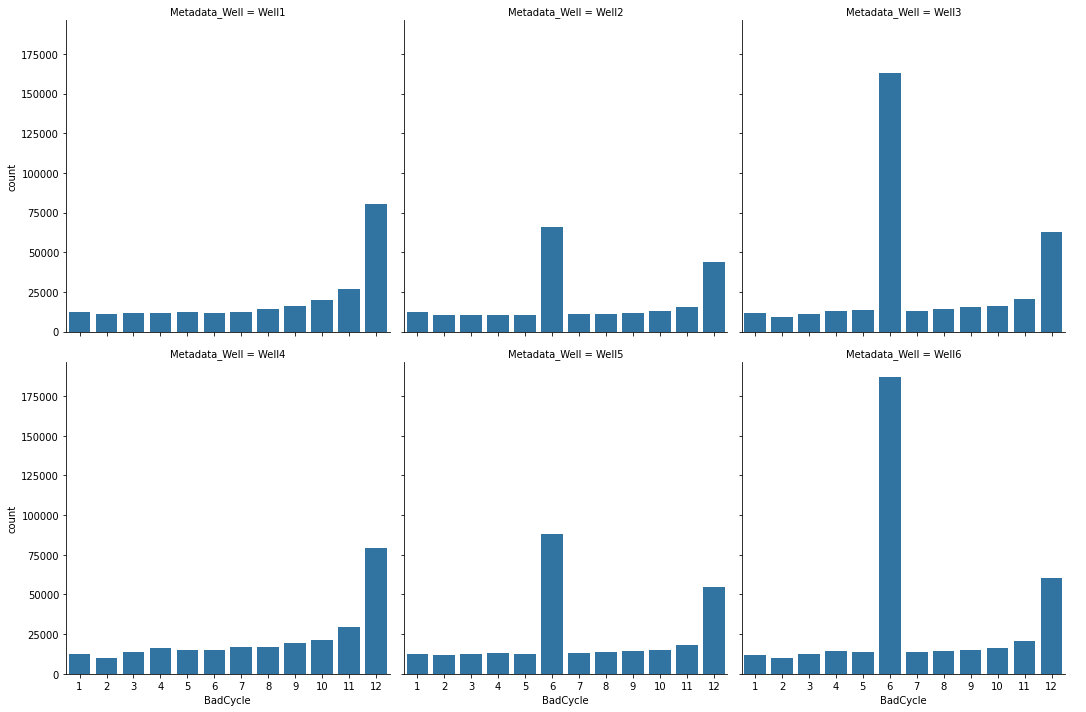

In [14]:
def returnbadcycle(query, target):
    for x in range(len(query)):
        if query[x]!=target[x]:
            return x+1
thresh =1-1/numcycles
df_onemismatch = df_foci.query('1 > Barcode_MatchedTo_Score > .85').reset_index(drop=True)
df_onemismatch['BadCycle']= df_onemismatch.apply(lambda x: returnbadcycle(x['Barcode_BarcodeCalled'],x['Barcode_MatchedTo_Barcode']), axis = 1)
sns.catplot(data=df_onemismatch,col='Metadata_Well',x='BadCycle',kind='count',col_wrap=3) #row='Metadata_Plate'

In [ ]:
perfect_df = df_foci[df_foci["Barcode_MatchedTo_Score"]==1]

print(f"The number of unique genes in the library is {len(bc_df[gene_col].unique())}")
print(f"Perfect barcodes are detected for {len(df_foci.loc[df_foci['Barcode_MatchedTo_Score']==1]['Barcode_MatchedTo_GeneCode'].unique())} genes\n")
print ("The 10 most detected genes are:")
print(df_foci.loc[df_foci['Barcode_MatchedTo_Score']==1].Barcode_MatchedTo_GeneCode.value_counts().head(n=10))
print(f"\nThe number of unique barcodes in the library is {len(bc_df[barcode_col].unique())}")
print(f"Perfect barcodes are detected for {len(df_foci.loc[df_foci['Barcode_MatchedTo_Score']==1]['Barcode_MatchedTo_Barcode'].unique())} of them\n")
print ("The 10 most detected barcodes are:")
print(df_foci.loc[df_foci['Barcode_MatchedTo_Score']==1].Barcode_MatchedTo_Barcode.value_counts().head(n=10))